# Data mining with python

### Contents
1. Import Necessary Libraries
2. Read In and Explore the Data
3. Data Analysis
4. Data Visualization
5. Cleaning Data
6. Using ML Models

### Data dict
VariableDefinitionKey 
* **survival** Survival 0 = No, 1 = Yes 
* **pclass** Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd 
* **sex** Sex 
* **age** Age in years 
* **sibsp** # of siblings / spouses aboard the Titanic parch # of parents / * children aboard the Titanic 
* **ticket** Ticket number 
* **fare** Passenger fare 
* **cabin** Cabin number 
* **embarked** Port * of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

**Variable Notes**

**pclass**: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.

## Crisp-DM
* Business understanding
* Data understanding
* Data preparation
* Modeling
* Evaluation
* Deployment

## 1. import necessary library

In [1]:
# Imports

# pandas
import pandas as pd

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import graphviz

%matplotlib inline

## 2. Read In and Explore the Data

In [2]:
# get titanic & test csv files as a DataFrame
df = pd.read_csv("./titanic_data_set/train.csv")

# preview the data
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Data Analysis

In [3]:
# columns
print(df.columns, '\n', df.shape)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 
 (891, 12)


In [4]:
# samples

df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.00,1,0,113776,66.6000,C2,S
479,480,1,3,"Hirvonen, Miss. Hildur E",female,2.00,0,1,3101298,12.2875,NaN,S
514,515,0,3,"Coleff, Mr. Satio",male,24.00,0,0,349209,7.4958,NaN,S


In [5]:
# there are some null values that need to be cleaned

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Type of Features
* **Numerical Features:** Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
* **Categorical Features:** Survived, Sex, Embarked, Pclass
* **Alphanumeric Features:** Ticket, Cabin

In [6]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Collyer, Mr. Harvey",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 4. Data Visualization

### Pclass Feature

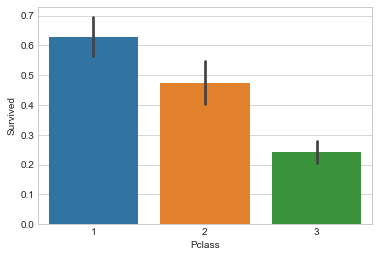

In [7]:
sns.barplot(df['Pclass'], df['Survived'], data=df)

Higher class could survive more.

### Sex Feature

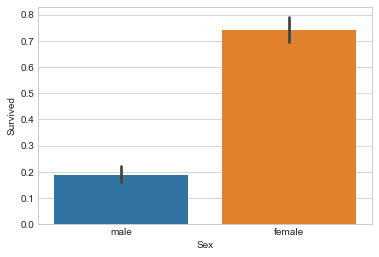

In [8]:
sns.barplot(df['Sex'], df['Survived'], data=df)

Female are more likely to survive.

### Age Feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
Age    714 non-null float64
dtypes: float64(1)
memory usage: 7.0 KB
None


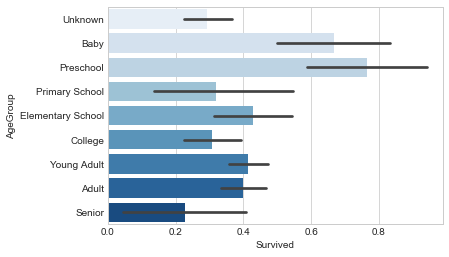

In [9]:
print(df[['Age']].info())
df['Age'] = df['Age'].astype(float).fillna(-0.5)
bins = [-1, 0, 3, 6, 12, 18, 23, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Preschool', 'Primary School', 'Elementary School', 'College', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# sns.barplot(df['AgeGroup'], df['Survived'], data=df)
#draw a bar plot of Age vs. survival
sns.barplot(df['Survived'], df['AgeGroup'], data=df, palette='Blues')
plt.show()

Baby and children are more likely to survive.

### SibSp Feature

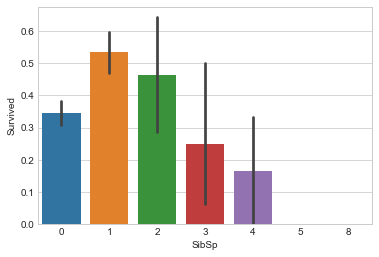

In [10]:
sns.barplot(df['SibSp'], df['Survived'], data=df)

In [11]:
#map each of the sip groups to a numerical value
sipSp_mapping = {0: 0, 1: 1, 2: 1}

df['SibSpGroup'] = df['SibSp'].map(sipSp_mapping)
df['SibSpGroup'] = df['SibSpGroup'].fillna(2)
df['SibSpGroup'] = df['SibSpGroup'].astype('int')

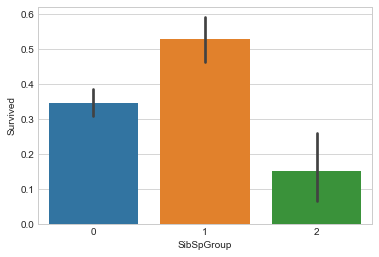

In [12]:
sns.barplot(df['SibSpGroup'], df['Survived'], data=df)

Combine SipSp to groups.

### Parch Feature

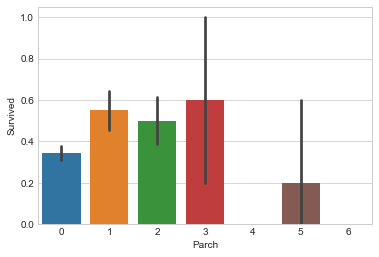

In [13]:
sns.barplot(df['Parch'], df['Survived'], data=df)

### Fare Feature

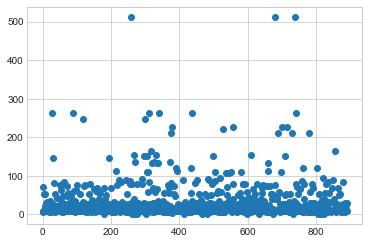

In [14]:
plt.scatter(df.index, df.Fare)
plt.show()

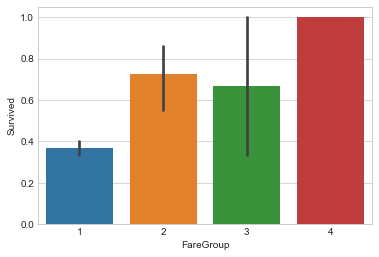

In [15]:
labels = [1, 2, 3, 4]
df['FareGroup'] = pd.cut(df['Fare'], 4, labels=labels)

sns.barplot(df['FareGroup'], df['Survived'], data=df)

Rich has higher chance to survive.

### Cabin Feature

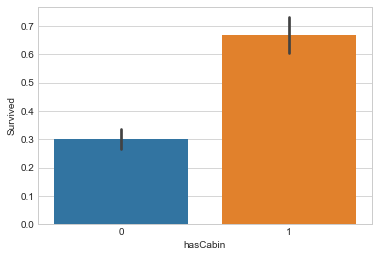

In [16]:
df['hasCabin'] = df['Cabin'].notnull().astype(int)

sns.barplot(df['hasCabin'], df['Survived'], data=df)

One who has a cabin might mean he is rich.

### Embark Feature

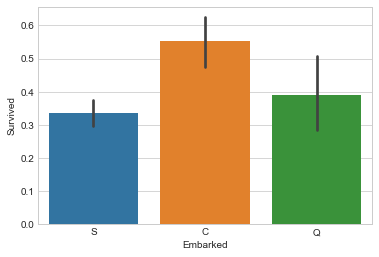

In [17]:
sns.barplot(df['Embarked'], df['Survived'], data=df)

## 5. Cleaning Data

### Find null values

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeGroup       891 non-null category
SibSpGroup     891 non-null int64
FareGroup      891 non-null category
hasCabin       891 non-null int64
dtypes: category(2), float64(2), int64(7), object(5)
memory usage: 99.8+ KB


### Pclass Feature

Do nothing.

### Age Feature

Fill null value by predicting from their titles.

In [19]:
df['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [20]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(df['Title'], df['Sex'])

# some of these are outlier.

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


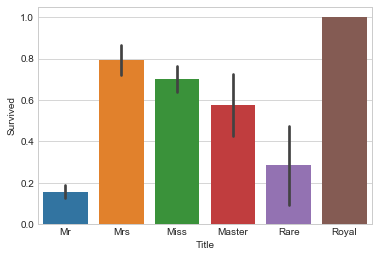

In [21]:
#replace various titles with more common names

df['Title'] = df['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
df['Title'] = df['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

sns.barplot(df['Title'], df['Survived'])

In [22]:
#map each of the title groups to a numerical value

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}

df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)

In [23]:
# check results
df[['Title']].sample(5)

,Title
456,1
760,1
525,1
164,4
240,2


In [24]:
# find age group for each title by mode

age_value = {}
for n in range(6):
    age_value[n+1] = df[df['Title'] == n+1]['AgeGroup'].mode()
    print(age_value[n+1].values)

[Young Adult]
Categories (9, object): [Unknown < Baby < Preschool < Primary School ... College < Young Adult < Adult < Senior]
[Young Adult]
Categories (9, object): [Unknown < Baby < Preschool < Primary School ... College < Young Adult < Adult < Senior]
[Adult]
Categories (9, object): [Unknown < Baby < Preschool < Primary School ... College < Young Adult < Adult < Senior]
[Baby]
Categories (9, object): [Unknown < Baby < Preschool < Primary School ... College < Young Adult < Adult < Senior]
[Young Adult, Adult]
Categories (9, object): [Unknown < Baby < Preschool < Primary School ... College < Young Adult < Adult < Senior]
[Adult]
Categories (9, object): [Unknown < Baby < Preschool < Primary School ... College < Young Adult < Adult < Senior]


In [25]:
# age title maping from previous result
age_title_mapping = {1: "Young Adult", 2: "Young Adult", 3: "Adult", 4: "Baby", 5: "Young Adult", 6: "Adult"}
# fill na with previous result
df.AgeGroup = df.AgeGroup.replace("Unknown", df["Title"].map(age_title_mapping))

In [26]:
df.AgeGroup

0                College
1                  Adult
2            Young Adult
3            Young Adult
4            Young Adult
5            Young Adult
6                  Adult
7                   Baby
8            Young Adult
9      Elementary School
10             Preschool
11                 Adult
12               College
13                 Adult
14     Elementary School
15                 Adult
16                  Baby
17           Young Adult
18           Young Adult
19                 Adult
20           Young Adult
21           Young Adult
22     Elementary School
23           Young Adult
24        Primary School
25                 Adult
26           Young Adult
27               College
28           Young Adult
29           Young Adult
             ...        
861              College
862                Adult
863          Young Adult
864          Young Adult
865                Adult
866          Young Adult
867          Young Adult
868          Young Adult
869            Preschool


In [27]:
# change agegroup's data type from category to int
age_mapping = {'Baby': 1, 'Preschool': 2, 'Primary School': 3, 'Elementary School': 4, 'College': 5, 'Young Adult': 6, 'Adult': 7, 'Senior': 8}
df.AgeGroup = df.AgeGroup.map(age_mapping)

### Sex Feature

In [28]:
# map Male = 1, Female = 0

df.Sex = (df.Sex.values == 'male').astype(int)
df['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

### SibSp Feature

Use SibSpGroup instead.

### Parch Feature

Do nothing.

### Fare Feature

In [29]:
#map Fare values into groups of numerical values

df['FareGroup'] = pd.cut(df['Fare'], 4, labels = [1, 2, 3, 4]).astype(int)
df[['Fare', 'FareGroup']].sample(10)

,Fare,FareGroup
593,7.7500,1
326,6.2375,1
527,221.7792,2
84,10.5000,1
724,53.1000,1
451,19.9667,1
601,7.8958,1
196,7.7500,1
54,61.9792,1
822,0.0000,1


### Cabin Feature

Use 'hasCabin' instead of 'Cabin'

### Embark Feature

In [30]:
# map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
df['Embarked'] = df['Embarked'].map(embarked_mapping)
# fill na with Cherbourg as most people come from there
df['Embarked'] = df['Embarked'].fillna(2).astype(int)
df.sample(5)

# Southampton : 1
# Cherbourg : 2
# Queenstown : 3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,SibSpGroup,FareGroup,hasCabin,Title
461,462,0,3,"Morley, Mr. William",1,34.0,0,0,364506,8.0500,NaN,1,6,0,1,0,1
696,697,0,3,"Kelly, Mr. James",1,44.0,0,0,363592,8.0500,NaN,1,7,0,1,0,1
326,327,0,3,"Nysveen, Mr. Johan Hansen",1,61.0,0,0,345364,6.2375,NaN,1,8,0,1,0,1
386,387,0,3,"Goodwin, Master. Sidney Leonard",1,1.0,5,2,CA 2144,46.9000,NaN,1,1,2,1,0,4
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",0,24.0,2,3,29106,18.7500,NaN,1,6,1,1,0,3


### Drop unneeded columns

In [31]:
# check our dataframe
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,SibSpGroup,FareGroup,hasCabin,Title
219,220,0,2,"Harris, Mr. Walter",1,30.0,0,0,W/C 14208,10.5000,NaN,1,6,0,1,0,1
395,396,0,3,"Johansson, Mr. Erik",1,22.0,0,0,350052,7.7958,NaN,1,5,0,1,0,1
446,447,1,2,"Mellinger, Miss. Madeleine Violet",0,13.0,0,1,250644,19.5000,NaN,1,4,0,1,0,2
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",0,38.0,1,5,347077,31.3875,NaN,1,7,1,1,0,3
757,758,0,2,"Bailey, Mr. Percy Andrew",1,18.0,0,0,29108,11.5000,NaN,1,4,0,1,0,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
AgeGroup       891 non-null int64
SibSpGroup     891 non-null int64
FareGroup      891 non-null int64
hasCabin       891 non-null int64
Title          891 non-null int64
dtypes: float64(2), int64(12), object(3)
memory usage: 118.4+ KB


In [33]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
df = df.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin', 'Age', 'SibSp', 'Title'], axis=1)

In [34]:
df.head()

,Survived,Pclass,Sex,Parch,Embarked,AgeGroup,SibSpGroup,FareGroup,hasCabin
0,0,3,1,0,1,5,1,1,0
1,1,1,0,0,2,7,1,1,1
2,1,3,0,0,1,6,0,1,0
3,1,1,0,0,1,6,1,1,1
4,0,3,1,0,1,6,0,1,0


## 6. Using ML Models

### split data

In [35]:
X = df.drop(columns='Survived')
y = df['Survived']

X_train = X.loc[0:701]
X_test = X.loc[701:]
y_train = y.loc[0:701]
y_test = y.loc[701:]

In [36]:
X_train.head()

,Pclass,Sex,Parch,Embarked,AgeGroup,SibSpGroup,FareGroup,hasCabin
0,3,1,0,1,5,1,1,0
1,1,0,0,2,7,1,1,1
2,3,0,0,1,6,0,1,0
3,1,0,0,1,6,1,1,1
4,3,1,0,1,6,0,1,0


In [37]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [38]:
X_test.head()

,Pclass,Sex,Parch,Embarked,AgeGroup,SibSpGroup,FareGroup,hasCabin
701,1,1,0,1,6,0,1,1
702,3,0,1,2,4,0,1,0
703,3,1,0,3,6,0,1,0
704,3,1,0,1,6,1,1,0
705,2,1,0,1,7,0,1,0


In [39]:
y_test.head()

701    1
702    0
703    0
704    0
705    0
Name: Survived, dtype: int64

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 8 columns):
Pclass        702 non-null int64
Sex           702 non-null int64
Parch         702 non-null int64
Embarked      702 non-null int64
AgeGroup      702 non-null int64
SibSpGroup    702 non-null int64
FareGroup     702 non-null int64
hasCabin      702 non-null int64
dtypes: int64(8)
memory usage: 44.0 KB


In [41]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 701 to 890
Data columns (total 8 columns):
Pclass        190 non-null int64
Sex           190 non-null int64
Parch         190 non-null int64
Embarked      190 non-null int64
AgeGroup      190 non-null int64
SibSpGroup    190 non-null int64
FareGroup     190 non-null int64
hasCabin      190 non-null int64
dtypes: int64(8)
memory usage: 12.0 KB


![alt text](https://i.imgur.com/uipmEwt.png)

### 3-Nearest Neighbor classification
with majority vote method

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
model_knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nprecision = ' + str((cm[0][0] + cm[1][1])/ (cm[0][1] + cm[1][0] + cm[0][0] + cm[1][1])))

[[104  16]
 [ 18  52]]

precision = 0.8210526315789474


In [44]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Naive Bayes classification

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model_gnb = gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [46]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nprecision = ' + str((cm[0][0] + cm[1][1])/ (cm[0][1] + cm[1][0] + cm[0][0] + cm[1][1])))

[[103  17]
 [ 17  53]]

precision = 0.8210526315789474


### Random Forest classification

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [48]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nprecision = ' + str((cm[0][0] + cm[1][1])/ (cm[0][1] + cm[1][0] + cm[0][0] + cm[1][1])))

[[111   9]
 [ 17  53]]

precision = 0.8631578947368421


## 7. Using 10-Fold-CV

In [49]:
# Necessary imports: 
from sklearn.cross_validation import cross_val_predict

/Users/toon/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 3-Nearest Neighbor classification

In [50]:
predicted = cross_val_predict(model_knn, X, y, cv=10)
cm = confusion_matrix(y, predicted)
print(cm)
print('\nprecision = ' + str((cm[0][0] + cm[1][1])/ (cm[0][1] + cm[1][0] + cm[0][0] + cm[1][1])))

[[471  78]
 [106 236]]

precision = 0.7934904601571269


### Naive Bayes classification

In [51]:
predicted = cross_val_predict(model_gnb, X, y, cv=10)
cm = confusion_matrix(y, predicted)
print(cm)
print('\nprecision = ' + str((cm[0][0] + cm[1][1])/ (cm[0][1] + cm[1][0] + cm[0][0] + cm[1][1])))

[[459  90]
 [124 218]]

precision = 0.7598204264870931


### Random Forest classification

In [52]:
predicted = cross_val_predict(model_rf, X, y, cv=10)
cm = confusion_matrix(y, predicted)
print(cm)
print('\nprecision = ' + str((cm[0][0] + cm[1][1])/ (cm[0][1] + cm[1][0] + cm[0][0] + cm[1][1])))

[[481  68]
 [111 231]]

precision = 0.7991021324354658


## 8. Reference

* https://www.kaggle.com/omarelgabry/a-journey-through-titanic?scriptVersionId=447802/notebook
* http://scikit-learn.org/stable/modules/naive_bayes.html
* http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* https://www.sanyamkapoor.com/machine-learning/confusion-matrix-visualization/
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.extract.html
* http://www.ritchieng.com/machinelearning-one-hot-encoding/
* https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
* http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
* http://scikit-learn.org/stable/modules/cross_validation.html
* https://stackoverflow.com/questions/41458834/how-is-scikit-learn-cross-val-predict-accuracy-score-calculated